In [7]:
import xarray as xr
import momlevel as ml

In [2]:
path = "/work/Katherine.Turner/tempest-extremes/odiv-251/data/*tos.regrid.nc"

ds = xr.open_mfdataset(path, use_cftime=True)

In [9]:
ml.trend.calc_linear_trend

<function momlevel.trend.calc_linear_trend(arr, dim='time', time_units=None)>

In [11]:
da = ds.tos.sel(lat=slice(-90,-30))

In [15]:
trend = ml.trend.calc_linear_trend(da)
trend = trend.load()

In [23]:
trend.tos_slope

<xarray.DataArray 'tos_slope' (lat: 60, lon: 288)>
array([[            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       ...,
       [-7.75968482e-20, -9.41912519e-20, -1.25352172e-19, ...,
        -3.82974076e-20, -4.91465434e-20, -6.43249692e-20],
       [-9.65101554e-20, -1.10548010e-19, -1.08605512e-19, ...,
        -4.10665095e-20, -5.69251648e-20, -7.39318455e-20],
       [-1.09789024e-19, -1.04963133e-19, -1.06065820e-19, ...,
        -8.39005372e-20, -1.05808942e-19, -1.17891481e-19]])
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -33.5 -32.5 -31.5 -30.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
Attributes:
    regrid_method:  bilinear
    comment:        Slope of linear trend
    units:           ns-1

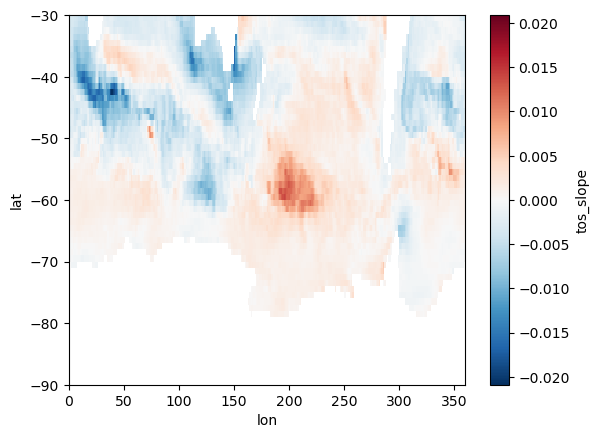

In [21]:
(1e9*365*60**2*24*trend.tos_slope).plot()

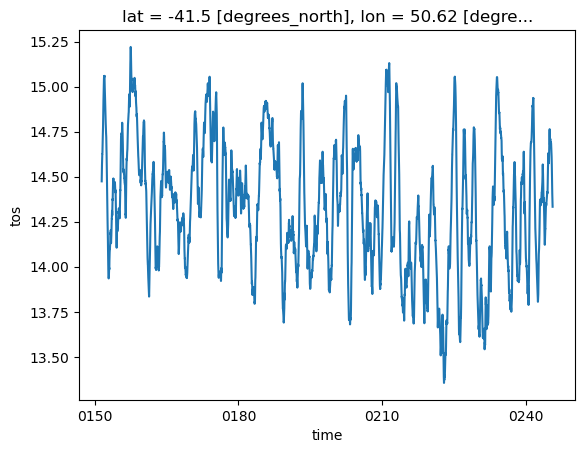

In [24]:
ds.tos.sel({"lat":-42, "lon":50}, method="nearest").rolling(time=365, center=True).mean().plot()